# Analyzing Image Similarity Using Greyscale Statistical Measures
Name: Xihao Cao

Date: 09/25/2022




### (1) Import the Images

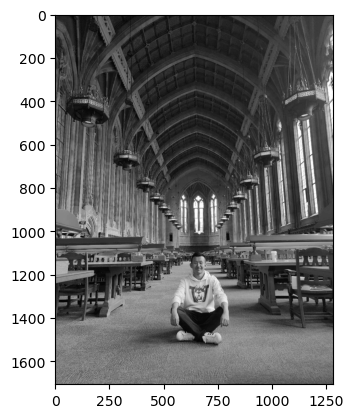

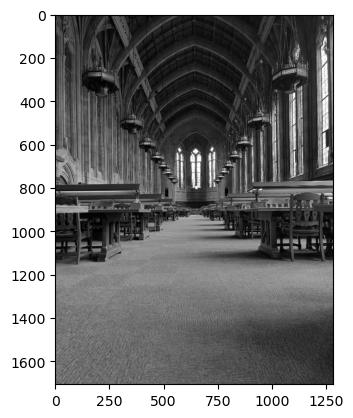

In [14]:
# import necessary packages
import numpy as np
import matplotlib.pyplot as plt
import skimage.io
import skimage.color
import warnings
warnings.filterwarnings('ignore')
%matplotlib widget
%matplotlib inline
#reference: https://datacarpentry.org/image-processing/05-creating-histograms/


# read the images
withme = skimage.io.imread(fname = "/Users/xihaoc/Downloads/Image_Similarity_in_Greyscale/withme.png",
                           as_gray = True)
withoutme = skimage.io.imread(fname = "/Users/xihaoc/Downloads/Image_Similarity_in_Greyscale/withoutme.png",
                              as_gray = True)


# disply the images in grey scale
fig, ax = plt.subplots()
plt.imshow(withme, cmap = "gray")
fig, ax = plt.subplots()
plt.imshow(withoutme, cmap = "gray")

The two imgaes selected are shown above, the first one is me sitting on the library floor, while the other was taken at the same place without me.  

### (2) Plot the gray scale histograms of two images

In [15]:
#hiscount stores the count of each gray scale from 0-255, binedges stores the bin boundaries info
hiscount1, bin_edges1 = np.histogram(withme, bins = 256, range = (0, 1))
hiscount2, bin_edges2 = np.histogram(withoutme, bins = 256, range = (0, 1))

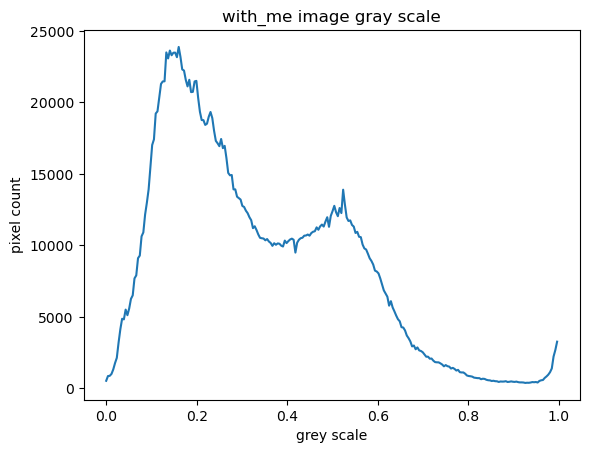

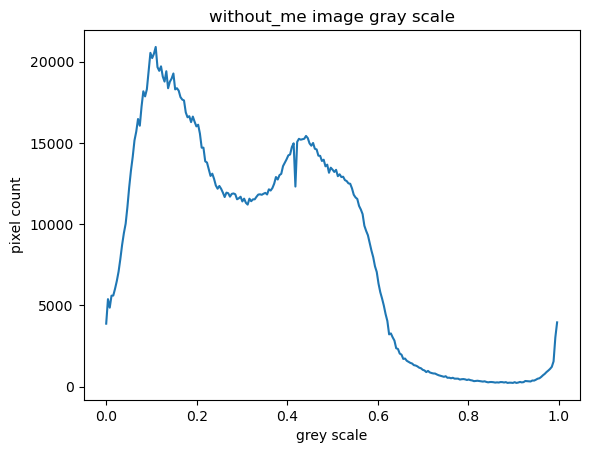

In [16]:
#plot the gray scale histograms
plt.figure()
plt.title("with_me image gray scale")
plt.xlabel("grey scale")
plt.ylabel("pixel count")
plt.plot(bin_edges1[0:-1], hiscount1)
plt.show()

plt.figure()
plt.title("without_me image gray scale")
plt.xlabel("grey scale")
plt.ylabel("pixel count")
plt.plot(bin_edges2[0:-1], hiscount2)
plt.show()

In the above plots, the grayscale frequency distributions of two images are displayed. Notably, the distributions are quite similar with only minor differences observed around grayscale values of 0-0.05 and 0.45.  

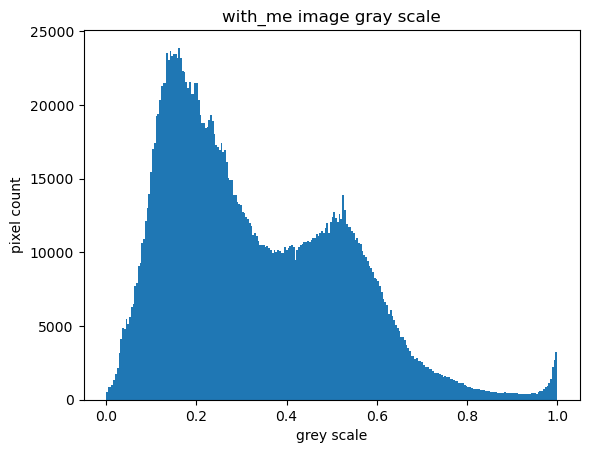

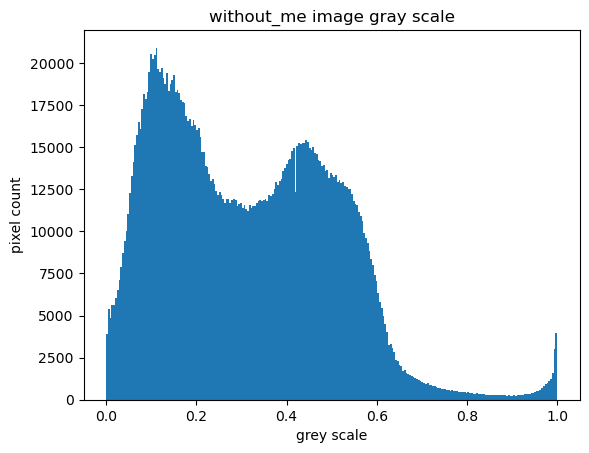

In [17]:
# try another format to plot the greyscale
with_gray = withme.flatten()
plt.figure()
plt.title("with_me image gray scale")
plt.xlabel("grey scale")
plt.ylabel("pixel count")
plt.hist(with_gray, bins=256, range=(0, 1))
plt.show()

without_gray = withoutme.flatten()
plt.figure()
plt.title("without_me image gray scale")
plt.xlabel("grey scale")
plt.ylabel("pixel count")
plt.hist(without_gray, bins=256, range=(0, 1))
plt.show()

The two plots above are also the gray scale distributions of the two images, but in a histogram format.  

### (3) calculated the kl div, js div, and conduct ks test on the images

In [18]:
# calculate Kullback–Leibler divergence
def kl_divergence(p, q):
    # normalise
    p = 1.0*p / np.sum(p, axis=0)
    q = 1.0*q / np.sum(q, axis=0)
    #additional check to not divide by zero
    return np.sum(np.where((p != 0) & (q != 0), p * np.log(p / q), 0))


# calculate Jensen–Shannon divergence
def js_divergence(p,q):
    p = 1.0*p / np.sum(p, axis=0)
    q = 1.0*q / np.sum(q, axis=0)
    m = 0.5 * (p + q)
    js = (kl_divergence(p, m) + kl_divergence(q, m))/2
    return js

print('The Kullback–Leibler divergence of two greyscale distributions are', 
      kl_divergence(with_gray, without_gray))

print('The Jensen–Shannon divergence of two greyscale distributions are', 
      js_divergence(with_gray, without_gray))


# perform Kolmogorov-Smirnov Test
from scipy.stats import kstest
print('Kolmogorov-Smirnov Test shows that', kstest(with_gray, without_gray))

The Kullback–Leibler divergence of two greyscale distributions are 0.33075205822183734
The Jensen–Shannon divergence of two greyscale distributions are 0.07207435666194287
Kolmogorov-Smirnov Test shows that KstestResult(statistic=0.06991592174677608, pvalue=0.0, statistic_location=0.11586470588235294, statistic_sign=-1)


<br>
<br>
The Kullback–Leibler divergence(with me || without me) is 0.33075205822183734. Since Kullback–Leibler divergence does not have an upper bound, it is hard to simply use this single number to judge whether the grescales of two images are similar without a reference value.

The Jensen–Shannon divergence(with me || without me) = 0.07207435666194287. Jensen–Shannon divergence is developed based on Kullback–Leibler divergence but with the value limited between 0 and 1. Since the Jensen–Shannon divergence of two images are quite close to 0, we can state that the two images are very similar in gray scale.

The Kolmogorov–Smirnov test gives us a statistic = 0.06991592174677608 with pvalue = 0.0, also supports the viewpoint that two images are similar.